# Importing Libraries

In [1]:
# performing linear algebra
import numpy as np

# data processing
import pandas as pd

# visualisation

import matplotlib.pyplot as plt

#Loading dataset

In [7]:
from google.colab import files

# This will prompt you to upload the file from your local system
uploaded = files.upload()


Saving breast-cancer.csv to breast-cancer.csv


In [9]:
df = pd.read_csv("breast-cancer.csv")
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

# Data Info

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# We are dropping columns – ‘id’ and ‘diagnosis’ as they have no role in prediction


In [13]:
df.drop(['diagnosis' , 'id'], axis = 1)
print(df.shape)

(569, 32)


# converting the diagnosis value of M and B to a numerical value where M (Malignant) = 1 and B (Benign) = 0

In [14]:
def diagnosis_value(diagnosis):
  if diagnosis == 'M':
    return 1
  else:
      return 0
df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)

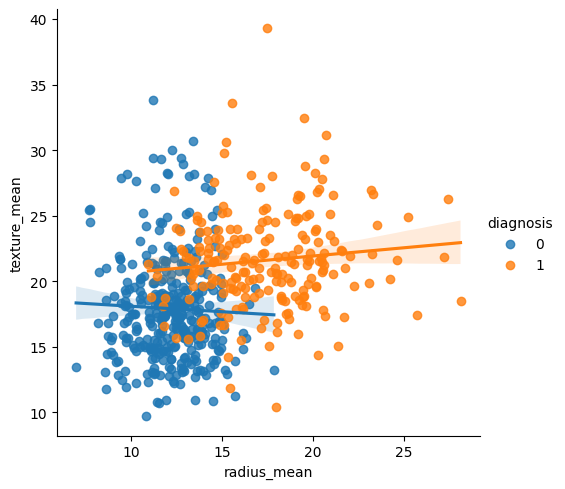

In [18]:
import seaborn as sns


# Now you can create the plot
sns.lmplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=df)
plt.show()


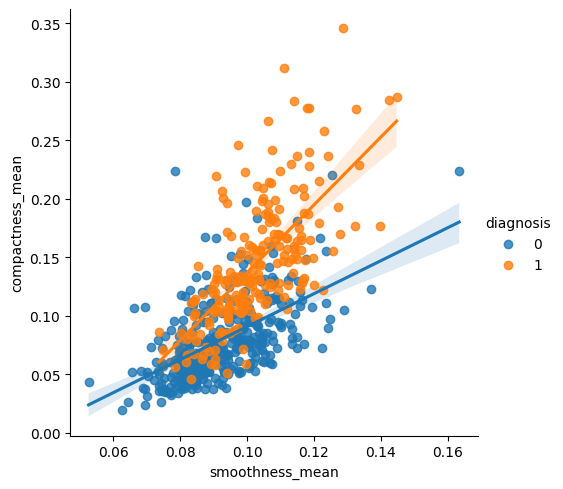

In [19]:
sns.lmplot(x='smoothness_mean' , y = 'compactness_mean' , data = df, hue = 'diagnosis')

# Input and Output data

In [20]:
x = np.array(df.iloc[:,1:])
y = np.array(df['diagnosis'])

# Spliting data to training and testing

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.33, random_state = 42)

# using Sklearn

In [29]:
from sklearn.neighbors import KNeighborsClassifier



knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=13)

# Prediction Score  

In [30]:
knn.score(x_test , y_test)

0.9627659574468085

# Performing Cross Validation

In [32]:
neighbors = []
cv_scores = []

from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(
        knn, x_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

# Misclassification error versus k


The optimal number of neighbors is  13 


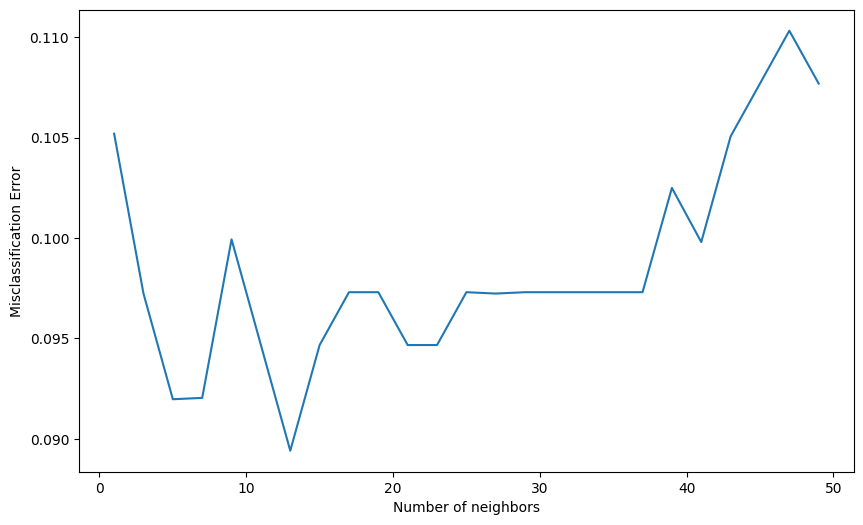

In [34]:
MSE = [1-x for x in cv_scores]

# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is % d ' % optimal_k)

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()